## Многочлены Лагранжа

In [2]:
from sympy import *
import matplotlib.pyplot as plt
import numpy as np

## По $n$ равноотстоящим узлам

In [3]:
x = Symbol('x')
def func(x):
    return x**2 + 4*sin(x) - 2

def lagrange_interpolate(a, b, n):
    """Вычисление и.п. Лагранжа по n равноотстоящим узлам"""
    x = Symbol('x')
    nodes = np.linspace(a, b, n)

    func_val = []
    for i in nodes:
        func_val.append(func(i))

    prod, s = 1, 0
    for i in range(0, len(nodes)):
        for j in range(0, len(nodes)):
            if i != j:
                prod *= ((x - nodes[j]) / (nodes[i] - nodes[j]))
        s += prod * func_val[i]
        prod = 1
        result = cancel(s)
    
    return result 

In [4]:
a = float(input('Введите левую границу a: '))
b = float(input('Введите правую границу b: '))
n = int(input('Введите число узлов n: '))

print('Интерполяционный полином Лагранжа L_{}'.format(n - 1), ':')
lagrange_function = lagrange_interpolate(a, b, n)
print(lagrange_function)

Введите левую границу a: -10
Введите правую границу b: 10
Введите число узлов n: 7
Интерполяционный полином Лагранжа L_6 :
-5.42101086242752e-20*x**6 - 0.000242470733651685*x**5 + 3.46944695195361e-18*x**4 + 0.0270657651277819*x**3 + 1.0*x**2 - 0.499477620617087*x - 2.0


## Изобразим полиномы $L_n$ при различных $n$

Введите максимальное число узлов n для визуализации эволюции L_n: 6


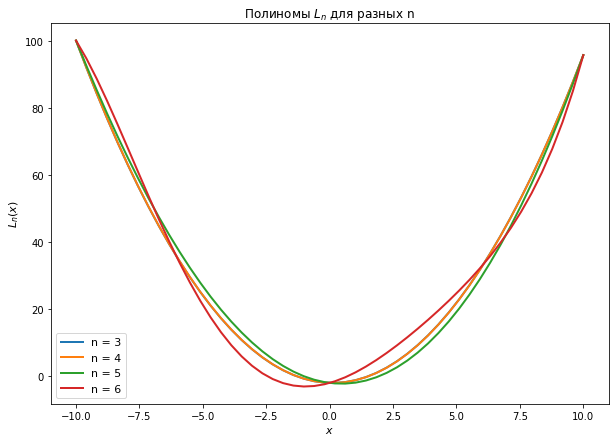

In [5]:
x = Symbol('x')
fig, ax = plt.subplots()
lagrange_vals = []
_ = int(input('Введите максимальное число узлов n для визуализации эволюции L_n: '))
xpoints = np.linspace(a, b)
for nn in range(3, _ + 1):
    LF = lagrange_interpolate(a, b, nn)
    for i in xpoints:
        lagrange_vals.append(LF.subs(x, i))   
    num_of_nodes = str(nn)
    plt.plot(xpoints, lagrange_vals, linewidth=2.0, 
             label = 'n = ' + num_of_nodes)
    plt.title('Полиномы $L_n$ для разных n')
    lagrange_vals = []

ax.legend()
plt.legend(fontsize=11)
fig.set_figheight(7)
fig.set_figwidth(10)
plt.xlabel(r'$x$', fontsize=11)
plt.ylabel(r'$L_n(x)$', fontsize=11)

plt.show()

## Построение полинома Лагранжа с помощью оптимальных узлов

In [6]:
def optimal_lagrange_interpolate(a, b, n):
    """Вычисление и.п. Лагранжа по n оптимальным узлам Чебышева"""
    x = Symbol('x')
    
    # оптимальные узлы Чебышева
    chebischev_nodes = []
    for i in range(0, n):
        chebischev_nodes.append(0.5 * ((b-a)*cos(((2*i+1)*np.pi)/(2*(n+1))) + (b+a)))
    
    func_val = []
    for j in chebischev_nodes:
        func_val.append(func(j))

    prod, s = 1, 0
    for i in range(0, len(chebischev_nodes)):
        for j in range(0, len(chebischev_nodes)):
            if i != j:
                prod *= ((x - chebischev_nodes[j]) / (chebischev_nodes[i] - chebischev_nodes[j]))
        s += prod * func_val[i]
        prod = 1
        result = cancel(s)
    
    return result 

In [7]:
print('Интерполяционный полином Лагранжа по узлам Чебышева L_{}'.format(n - 1), ':')
opt_lagr_inter = optimal_lagrange_interpolate(a, b, n)
print(opt_lagr_inter)

Интерполяционный полином Лагранжа по узлам Чебышева L_6 :
-0.000255382771320714*x**6 + 0.00171177826900017*x**5 + 0.0265102699291462*x**4 - 0.147406270327743*x**3 + 0.357843644392765*x**2 + 2.44022505677161*x + 0.0741193689385788


## Изобразим полиномы $Lopt_n$ при различных $n$

Введите максимальное число узлов n для визуализации эволюции Lopt_n: 5


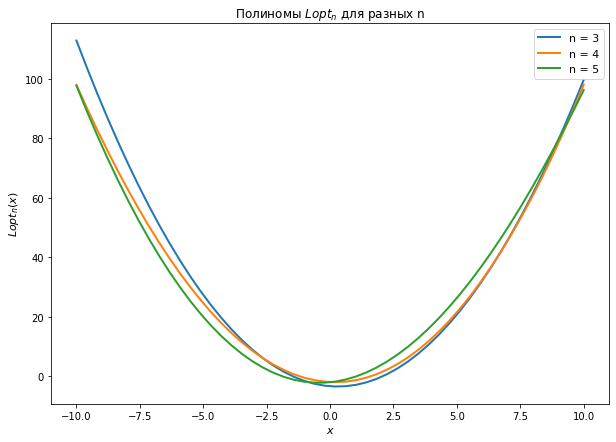

In [8]:
x = Symbol('x')
fig, ax = plt.subplots()
optimal_lagrange_vals = []
_ = int(input('Введите максимальное число узлов n для визуализации эволюции Lopt_n: '))
xpoints = np.linspace(a, b)
for nn in range(3, _ + 1):
    LFopt = optimal_lagrange_interpolate(a, b, nn)
    for i in xpoints:
        optimal_lagrange_vals.append(LFopt.subs(x, i))   
    num_of_nodes = str(nn)
    plt.plot(xpoints, optimal_lagrange_vals, linewidth=2.0, 
             label = 'n = ' + num_of_nodes)
    plt.title('Полиномы $Lopt_n$ для разных n')
    optimal_lagrange_vals = []
    
ax.legend()
plt.legend(fontsize=11)
fig.set_figheight(7)
fig.set_figwidth(10)
plt.xlabel(r'$x$', fontsize=11)
plt.ylabel(r'$Lopt_n(x)$', fontsize=11)
plt.show()

## Визуализация эволюции $L_n, Lopt_n$ в сравнении с $f(x)$

Введите максимальное число n узлов для визуализация эволюции всех трех графиков: 10


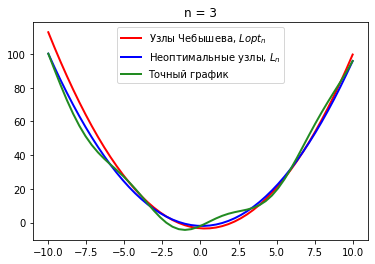

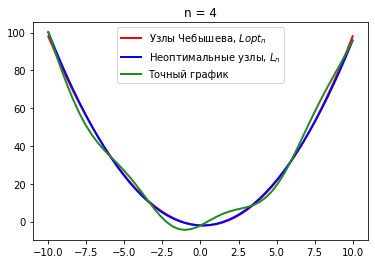

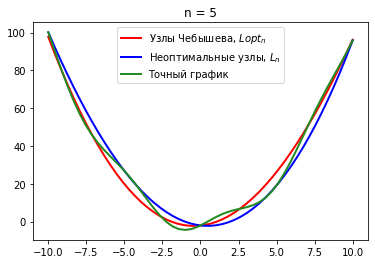

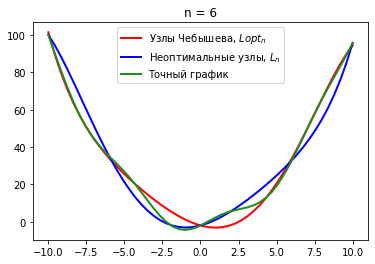

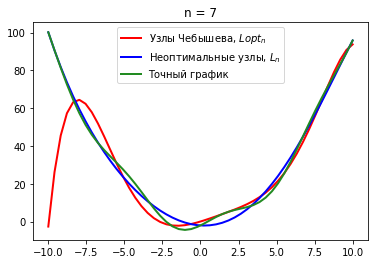

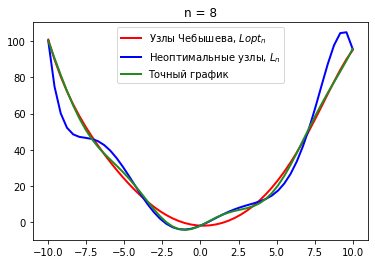

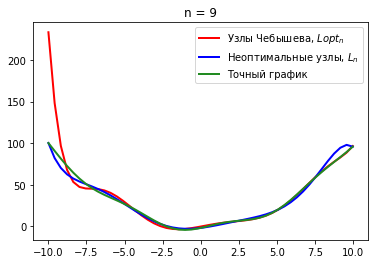

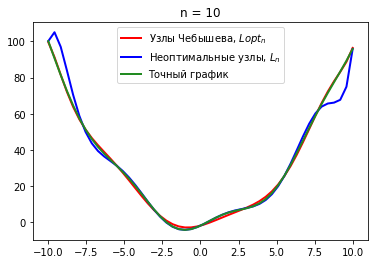

In [9]:
# визуализация эволюции всех трех графиков
x = Symbol('x')
fig, ax = plt.subplots()
xpoints = np.linspace(a, b)

nn = int(input('Введите максимальное число n узлов для визуализация эволюции всех трех графиков: '))
for num in range(3, nn + 1):
    # "оптимальные" узлы
    optimal = []
    opt_lagr = optimal_lagrange_interpolate(a, b, num)
    for i in xpoints:
        optimal.append(opt_lagr.subs(x, i))
    plt.plot(xpoints, optimal, label ='Узлы Чебышева, $Lopt_n$', linewidth=2.0, color='red')

    
    # "неоптимальные" узлы
    non_optimal = []
    lagrange_func = lagrange_interpolate(a, b, num)
    for i in xpoints:
        non_optimal.append(lagrange_func.subs(x, i))    
    plt.plot(xpoints, non_optimal, label ='Неоптимальные узлы, $L_n$', linewidth=2.0, color='blue')
    
    # точный график
    ypoints = []
    y = x**2 + 4*sin(x) - 2
    for i in xpoints:
        ypoints.append(y.subs(x, i))    
    plt.plot(xpoints, ypoints, label ='Точный график', linewidth=2.0, color='forestgreen')
    num_of_nodes = str(num)
    plt.legend()
    plt.title('n = ' + num_of_nodes)
    plt.show()
    

fig.set_figheight(7)
fig.set_figwidth(10)

# Определим отклонения $L_n, Lopt_n$ от функции $f(x)$ для разных $n$

In [10]:
x = Symbol('x')
m = int(input('Введите количество m точек разбиения интервала интерполирования, в которых определяются отклонения L_n, Lopt_n от функции f(x): '))
# mds = maximum_difference_segment
mds = np.linspace(a, b, m)

func_mds = []
lagrange_mds = []
optimal_lagrange_mds = []
RLn = []
RLopt_n = []

# значения точной функции в точках x0, x1, ..., xm; m >> n
for i in mds:
    func_mds.append(func(i))

print('Таблица 1:')
print('-----------------------------------------------------------------------------------------------------------')
print('| кол-во узлов, n | кол-во точек разбиения, m   | max(RL_n) \t\t | max(RLOpt_n) \t\t|' )
print('-----------------------------------------------------------------------------------------------------------')

for pp in range(2, n + 1):
    # L_n
    lagrange_deviations = lagrange_interpolate(a, b, pp)
    # Lopt_n
    optimal_lagrange_deviations = optimal_lagrange_interpolate(a, b, pp)
    for p in mds:
        # значения полинома Лагранжа L_n в точках x0, x1, ..., xm; m >> n
        lagrange_mds.append(lagrange_deviations.subs(x, p))
        # значения полинома Лагранжа Lopt_n (узлы Чебышева) в точках x0, x1, ..., xm; m >> n
        optimal_lagrange_mds.append(optimal_lagrange_deviations.subs(x, p))
      
    # отклонения
    for j in range(len(mds)):
        RLn.append(Abs(func_mds[j] - lagrange_mds[j]))
        RLopt_n.append(Abs(func_mds[j] - optimal_lagrange_mds[j]))
    RLn_max = max(RLn)
    RLn_opt_max = max(RLopt_n)
    print('|\t', pp, '\t|\t\t', m, '\t  |', RLn_max, '\t|', RLn_opt_max, '\t\t |')
    print('-----------------------------------------------------------------------------------------------------------')
    RLn = []
    RLopt_n = []
    RLn_max, RLn_opt_max = 0, 0
    lagrange_mds = []
    optimal_lagrange_mds = []

Введите количество m точек разбиения интервала интерполирования, в которых определяются отклонения L_n, Lopt_n от функции f(x): 100
Таблица 1:
-----------------------------------------------------------------------------------------------------------
| кол-во узлов, n | кол-во точек разбиения, m   | max(RL_n) 		 | max(RLOpt_n) 		|
-----------------------------------------------------------------------------------------------------------
|	 2 	|		 100 	  | 102.591988063281 	| 191.975729588062 		 |
-----------------------------------------------------------------------------------------------------------
|	 3 	|		 100 	  | 5.70485366038628 	| 14.3887046061906 		 |
-----------------------------------------------------------------------------------------------------------
|	 4 	|		 100 	  | 5.74096084986963 	| 5.23694505288341 		 |
-----------------------------------------------------------------------------------------------------------
|	 5 	|		 100 	  | 7.93229516590132 	| 7.23582435667

## Многочлены Ньютона

In [11]:
x = Symbol('x')

# вычисляем полином Ньютона, N_k
def newton_polynomial(a, b, k):
    nodes = np.linspace(a, b, k)
    x = Symbol('x')
    func_val = []
    for i in nodes:
        func_val.append(func(i))
        
    # поститать f(x0; ...; xk) - разделенные разности
    def divided_differences(k):
        f_x0_to_xk, prod = 0, 1
        for j in range(0, k + 1):
            for i in range(0, k + 1):
                if i != j:
                    prod *= (nodes[j]-nodes[i])
            f_x0_to_xk += func_val[j] / prod
            prod = 1
        return f_x0_to_xk
    
    product = 1
    newton = divided_differences(0)
    for i in range(1, k):
        product *= (x-nodes[i-1])
        newton += divided_differences(i)*product
    newt = cancel(newton)
    return newt

## Построение полинома Ньютона с помощью оптимальных узлов

In [12]:
def optimal_newtone_interpolate(a, b, k):
    """Вычисление и.п. Ньютона по n оптимальным узлам Чебышева"""
    x = Symbol('x')
    
    # оптимальные узлы Чебышева
    chebischev_nodes = []
    for i in range(0, k):
        chebischev_nodes.append(0.5 * ((b-a)*cos(((2*i+1)*np.pi)/(2*(k+1))) + (b+a)))
    
    func_val = []
    for j in chebischev_nodes:
        func_val.append(func(j))
        
    def divided_differences(k):
        f_x0_to_xk, prod = 0, 1
        for j in range(0, k + 1):
            for i in range(0, k + 1):
                if i != j:
                    prod *= (chebischev_nodes[j]-chebischev_nodes[i])
            f_x0_to_xk += func_val[j] / prod
            prod = 1
        return f_x0_to_xk
    
    product = 1
    newton = divided_differences(0)
    for i in range(1, k):
        product *= (x-chebischev_nodes[i-1])
        newton += divided_differences(i)*product
    
    res = cancel(newton)
    return res

In [13]:
print('Интерполяционный полином Ньютона N_{}'.format(n - 1), ':')
newton_interpolate = newton_polynomial(a, b, n)
print(newton_interpolate)

Интерполяционный полином Ньютона N_6 :
-1.0842021724855e-19*x**6 - 0.000242470733651685*x**5 + 1.99011332105117e-17*x**4 + 0.0270657651277819*x**3 + 0.999999999999999*x**2 - 0.499477620617091*x - 2.0


## Изобразим полиномы $N_n$ при различных $n$

Введите максимальное число узлов n для визуализации эволюции N_n: 5


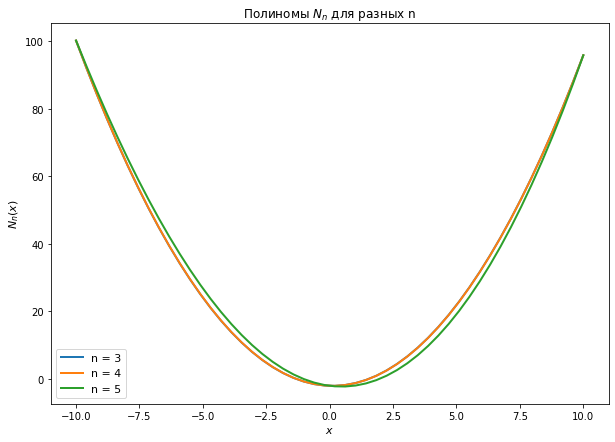

In [15]:
x = Symbol('x')
fig, ax = plt.subplots()
newt_vals = []
_ = int(input('Введите максимальное число узлов n для визуализации эволюции N_n: '))
xpoints = np.linspace(a, b)
for nn in range(3, _ + 1):
    NP = newton_polynomial(a, b, nn)
    for i in xpoints:
        newt_vals.append(NP.subs(x, i))   
    num_of_nodes = str(nn)
    plt.plot(xpoints, newt_vals, linewidth=2.0, 
             label = 'n = ' + num_of_nodes)
    plt.title('Полиномы $N_n$ для разных n')
    newt_vals = []

ax.legend()
plt.legend(fontsize=11)
fig.set_figheight(7)
fig.set_figwidth(10)
plt.xlabel(r'$x$', fontsize=11)
plt.ylabel(r'$N_n(x)$', fontsize=11)

plt.show()

## Изобразим полиномы $Nopt_n$ при различных $n$

Введите максимальное число узлов n для визуализации эволюции Nopt_n: 5


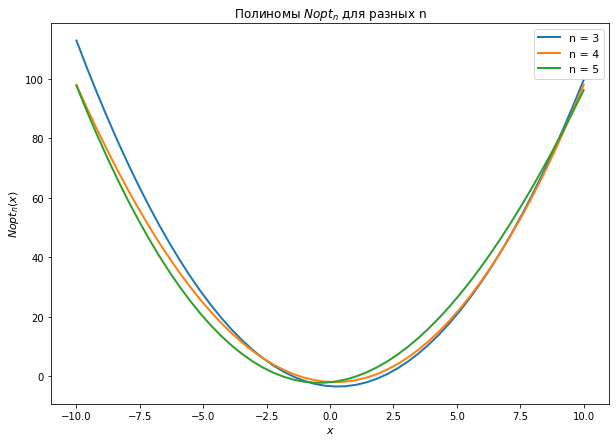

In [16]:
x = Symbol('x')
fig, ax = plt.subplots()
optimal_newt_vals = []
_ = int(input('Введите максимальное число узлов n для визуализации эволюции Nopt_n: '))
xpoints = np.linspace(a, b)
for nn in range(3, _ + 1):
    NFopt = optimal_newtone_interpolate(a, b, nn)
    for i in xpoints:
        optimal_newt_vals.append(NFopt.subs(x, i))   
    num_of_nodes = str(nn)
    plt.plot(xpoints, optimal_newt_vals, linewidth=2.0, 
             label = 'n = ' + num_of_nodes)
    plt.title('Полиномы $Nopt_n$ для разных n')
    optimal_newt_vals = []
    
ax.legend()
plt.legend(fontsize=11)
fig.set_figheight(7)
fig.set_figwidth(10)
plt.xlabel(r'$x$', fontsize=11)
plt.ylabel(r'$Nopt_n(x)$', fontsize=11)
plt.show()

## Визуализация эволюции $N_n, Nopt_n$ в сравнении с $f(x)$

Введите максимальное число n узлов для визуализация эволюции всех трех графиков: 10


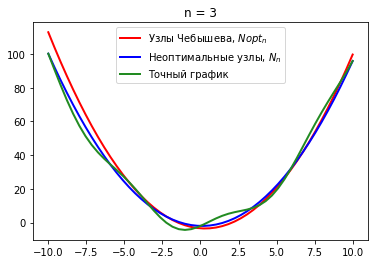

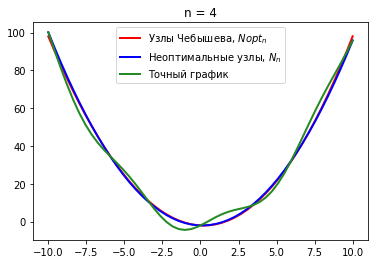

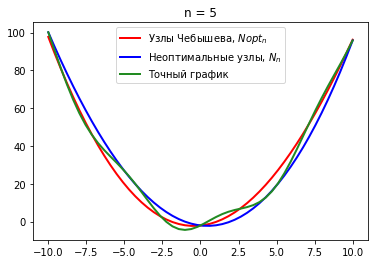

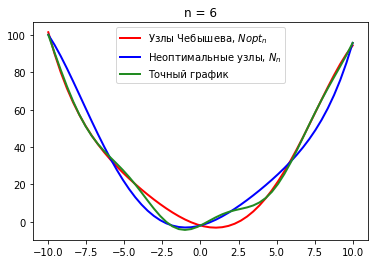

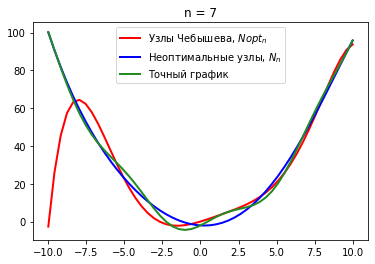

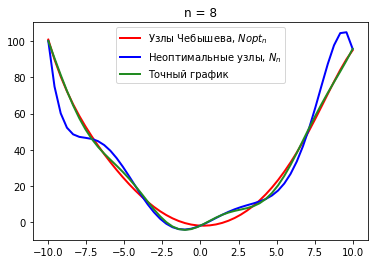

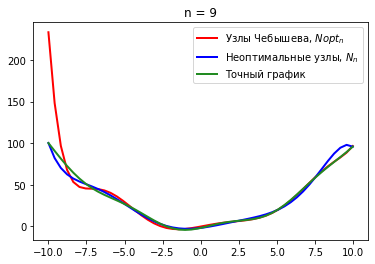

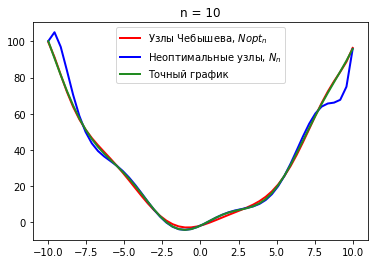

In [17]:
x = Symbol('x')
fig, ax = plt.subplots()
xpoints = np.linspace(a, b)

nn = int(input('Введите максимальное число n узлов для визуализация эволюции всех трех графиков: '))
for num in range(3, nn + 1):
    # "оптимальные" узлы
    optimal = []
    opt_newt = optimal_newtone_interpolate(a, b, num)
    for i in xpoints:
        optimal.append(opt_newt.subs(x, i))
    plt.plot(xpoints, optimal, label ='Узлы Чебышева, $Nopt_n$', linewidth=2.0, color='red')

    
    # "неоптимальные" узлы
    non_optimal = []
    newtone_func = newton_polynomial(a, b, num)
    for i in xpoints:
        non_optimal.append(newtone_func.subs(x, i))    
    plt.plot(xpoints, non_optimal, label ='Неоптимальные узлы, $N_n$', linewidth=2.0, color='blue')
    
    # точный график
    ypoints = []
    y = x**2 + 4*sin(x) - 2
    for i in xpoints:
        ypoints.append(y.subs(x, i))    
    plt.plot(xpoints, ypoints, label ='Точный график', linewidth=2.0, color='forestgreen')
    num_of_nodes = str(num)
    plt.legend()
    plt.title('n = ' + num_of_nodes)
    plt.show()
    


fig.set_figheight(7)
fig.set_figwidth(10)

## Определим отклонения $N_n, Nopt_n$ от функции $f(x)$

In [18]:
x = Symbol('x')
m = int(input('Введите количество m точек разбиения интервала интерполирования, в которых определяются отклонения N_n, Nopt_n от функции f(x): '))
# mds = maximum_difference_segment
mds = np.linspace(a, b, m)

func_mds = []
newton_mds = []
optimal_newton_mds = []
RNn = []
RNopt_n = []

# значения точной функции в точках x0, x1, ..., xm; m >> n
for i in mds:
    func_mds.append(func(i))

print('Таблица 2:')
print('-----------------------------------------------------------------------------------------------------------')
print('| кол-во узлов, n | кол-во точек разбиения, m   | max(RN_n) \t\t | max(RNOpt_n) \t\t|' )
print('-----------------------------------------------------------------------------------------------------------')

for pp in range(2, n + 1):
    # N_n
    newton_deviations = newton_polynomial(a, b, pp)
    # Nopt_n
    optimal_newton_deviations = optimal_newtone_interpolate(a, b, pp)
    for p in mds:
        # значения полинома Ньютона N_n в точках x0, x1, ..., xm; m >> n
        newton_mds.append(newton_deviations.subs(x, p))
        # значения полинома Ньютона Nopt_n (узлы Чебышева) в точках x0, x1, ..., xm; m >> n
        optimal_newton_mds.append(optimal_newton_deviations.subs(x, p))
      
    # отклонения
    for j in range(len(mds)):
        RNn.append(Abs(func_mds[j] - newton_mds[j]))
        RNopt_n.append(Abs(func_mds[j] - optimal_newton_mds[j]))
    RNn_max = max(RNn)
    RNn_opt_max = max(RNopt_n)
    print('|\t', pp, '\t|\t\t', m, '\t  |', RNn_max, '\t|', RNn_opt_max, '\t\t |')
    print('-----------------------------------------------------------------------------------------------------------')
    RNn = []
    RNopt_n = []
    RNn_max, RNn_opt_max = 0, 0
    newton_mds = []
    optimal_newton_mds = []

Введите количество m точек разбиения интервала интерполирования, в которых определяются отклонения N_n, Nopt_n от функции f(x): 10
Таблица 2:
-----------------------------------------------------------------------------------------------------------
| кол-во узлов, n | кол-во точек разбиения, m   | max(RN_n) 		 | max(RNOpt_n) 		|
-----------------------------------------------------------------------------------------------------------
|	 2 	|		 10 	  | 102.591988063281 	| 191.975729588062 		 |
-----------------------------------------------------------------------------------------------------------
|	 3 	|		 10 	  | 5.68090168654243 	| 13.5756508222571 		 |
-----------------------------------------------------------------------------------------------------------
|	 4 	|		 10 	  | 5.71917910761098 	| 5.23694505288343 		 |
-----------------------------------------------------------------------------------------------------------
|	 5 	|		 10 	  | 7.93229516590132 	| 6.00024471774596 	